# Распознаем рукописные цифры

### Домашнее задание. Часть 1
Добиться точности на тестовой выборке >93% (**2 балла**).

Добиться точности на тестовой выборке >97% (**+2 балла**).

Для этого варьировать архитектуру сети (количество слоев, размер скрытого слоя, нелинейности).
<br>
Параметры обучения (количество эпох, размер батча, скорость обучения).

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [2]:
# Параметры
input_size = 784 # Размер входной картинки
# hidden_size = 32 # Количество нейронов в скрытом слое. Можем регулировать
hidden_size = 64 # Количество нейронов в скрытом слое. Можем регулировать
num_classes = 10 # Количество целевых классов (цифр в нашем случае)
#num_epochs = 5   # Сколько эпох обучаем. Одна эпоха - один проход по обучающей выборке
num_epochs = 50   # Сколько эпох обучаем. Одна эпоха - один проход по обучающей выборке
batch_size = 100 # Размер батча
learning_rate = 0.2 # Скорость обучения

** Загружаем данные **

In [3]:
# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

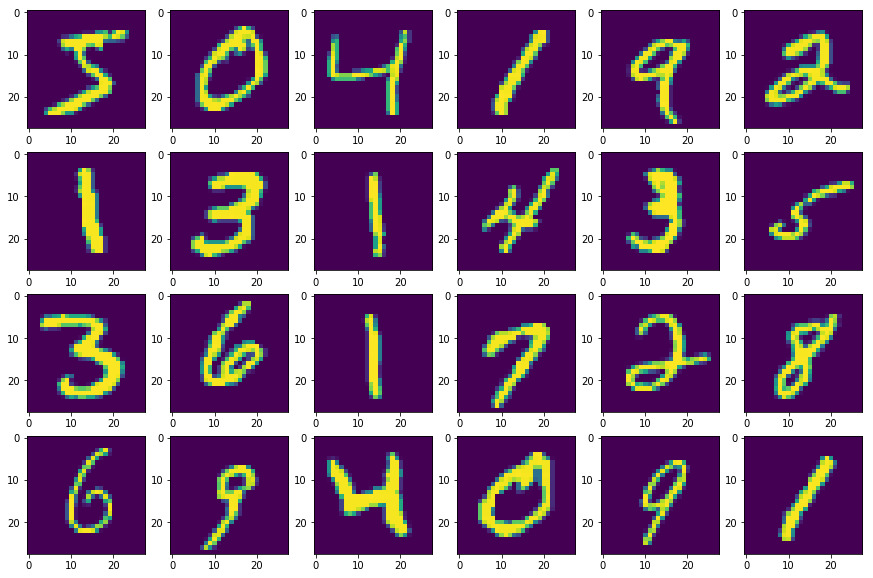

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
for i in range(6*4):
    plt.subplot(4,6,i+1)
    plt.imshow(train_dataset[i][0][0])

### Нейросеть

# 1 подход (больше 93, но до 97 не дотягивает/дотягивает редко)
- 50 эпох
- lr 0.2
- размер скрытых слоев 64
- Переобучается после достижения примерно 96
- При разных запусках может не достичь 97, что логично при вышеуказанном пункте
- В данном запуске превысило 97

In [5]:
# NN model
model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.Sigmoid(),
    nn.Linear(hidden_size, hidden_size),
    nn.Sigmoid(),
    nn.Linear(hidden_size, hidden_size),
    nn.Sigmoid(),
    nn.Linear(hidden_size, num_classes),
)

In [6]:
criterion = nn.CrossEntropyLoss()  

In [7]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)  

In [8]:
def eval_model(model, sample_loader):
    # Test the model
    # In test phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in sample_loader:
            images = images.reshape(-1, 28*28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum()
            
    accuracy = float(correct)/total
    return accuracy


# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    train_acc = eval_model(model, train_loader)
    test_acc = eval_model(model, test_loader)  
    print(f'Epoch {epoch+1}. Train accuracy {train_acc:.2%}. Test accuracy {test_acc:.2%}.')

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/50], Step [100/600], Loss: 2.3241
Epoch [1/50], Step [200/600], Loss: 2.3302
Epoch [1/50], Step [300/600], Loss: 2.3089
Epoch [1/50], Step [400/600], Loss: 2.2902
Epoch [1/50], Step [500/600], Loss: 2.3190
Epoch [1/50], Step [600/600], Loss: 2.3046
Epoch 1. Train accuracy 10.44%. Test accuracy 10.28%.
Epoch [2/50], Step [100/600], Loss: 2.3050
Epoch [2/50], Step [200/600], Loss: 2.2810
Epoch [2/50], Step [300/600], Loss: 2.2921
Epoch [2/50], Step [400/600], Loss: 2.2870
Epoch [2/50], Step [500/600], Loss: 2.3028
Epoch [2/50], Step [600/600], Loss: 2.3076
Epoch 2. Train accuracy 12.07%. Test accuracy 12.18%.
Epoch [3/50], Step [100/600], Loss: 2.3120
Epoch [3/50], Step [200/600], Loss: 2.2719
Epoch [3/50], Step [300/600], Loss: 2.2144
Epoch [3/50], Step [400/600], Loss: 2.0721
Epoch [3/50], Step [500/600], Loss: 1.9233
Epoch [3/50], Step [600/600], Loss: 1.7031
Epoch 3. Train accuracy 33.60%. Test accuracy 32.95%.
Epoch [4/50], Step [100/600], Loss: 1.6105
Epoch [4/50], Step [2

Epoch [27/50], Step [100/600], Loss: 0.0622
Epoch [27/50], Step [200/600], Loss: 0.0370
Epoch [27/50], Step [300/600], Loss: 0.0360
Epoch [27/50], Step [400/600], Loss: 0.0807
Epoch [27/50], Step [500/600], Loss: 0.0400
Epoch [27/50], Step [600/600], Loss: 0.0745
Epoch 27. Train accuracy 97.98%. Test accuracy 96.55%.
Epoch [28/50], Step [100/600], Loss: 0.0951
Epoch [28/50], Step [200/600], Loss: 0.0522
Epoch [28/50], Step [300/600], Loss: 0.0764
Epoch [28/50], Step [400/600], Loss: 0.0155
Epoch [28/50], Step [500/600], Loss: 0.0627
Epoch [28/50], Step [600/600], Loss: 0.0448
Epoch 28. Train accuracy 98.33%. Test accuracy 96.78%.
Epoch [29/50], Step [100/600], Loss: 0.0678
Epoch [29/50], Step [200/600], Loss: 0.0519
Epoch [29/50], Step [300/600], Loss: 0.0312
Epoch [29/50], Step [400/600], Loss: 0.1088
Epoch [29/50], Step [500/600], Loss: 0.0213
Epoch [29/50], Step [600/600], Loss: 0.0358
Epoch 29. Train accuracy 98.58%. Test accuracy 96.90%.
Epoch [30/50], Step [100/600], Loss: 0.0334

# 2 подход (больше 97)
- ReLU
- Больше скрытых слоев
- Разные размеры скрытых слоев
- Лучший результат выше 98, но дальше не будет, так как дальше переобучается

In [9]:
num_epochs = 20   # Сколько эпох обучаем. Одна эпоха - один проход по обучающей выборке

In [10]:
hidden_size_2 = 400
model = nn.Sequential(
    nn.Linear(input_size, hidden_size_2),
    nn.ReLU(),
    nn.Linear(hidden_size_2, int(hidden_size_2 / 2)),
    nn.ReLU(),    
    nn.Linear(int(hidden_size_2 / 2), int(hidden_size_2 / 4)),
    nn.ReLU(),
    nn.Linear(int(hidden_size_2 / 4), int(hidden_size_2 / 8)),
    nn.ReLU(),
    nn.Linear(int(hidden_size_2 / 8), int(hidden_size_2 / 16)),
    nn.ReLU(),
    nn.Linear(int(hidden_size_2 / 16), num_classes),
)

In [11]:
criterion = nn.CrossEntropyLoss()  

In [12]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)  

In [13]:
def eval_model(model, sample_loader):
    # Test the model
    # In test phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in sample_loader:
            images = images.reshape(-1, 28*28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum()
            
    accuracy = float(correct)/total
    return accuracy


# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    train_acc = eval_model(model, train_loader)
    test_acc = eval_model(model, test_loader)  
    print(f'Epoch {epoch+1}. Train accuracy {train_acc:.2%}. Test accuracy {test_acc:.2%}.')

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/20], Step [100/600], Loss: 2.2911
Epoch [1/20], Step [200/600], Loss: 1.7538
Epoch [1/20], Step [300/600], Loss: 1.0087
Epoch [1/20], Step [400/600], Loss: 0.4745
Epoch [1/20], Step [500/600], Loss: 0.1619
Epoch [1/20], Step [600/600], Loss: 0.4845
Epoch 1. Train accuracy 85.00%. Test accuracy 85.25%.
Epoch [2/20], Step [100/600], Loss: 0.1485
Epoch [2/20], Step [200/600], Loss: 0.1985
Epoch [2/20], Step [300/600], Loss: 0.2693
Epoch [2/20], Step [400/600], Loss: 0.0998
Epoch [2/20], Step [500/600], Loss: 0.0958
Epoch [2/20], Step [600/600], Loss: 0.2421
Epoch 2. Train accuracy 97.28%. Test accuracy 96.65%.
Epoch [3/20], Step [100/600], Loss: 0.1336
Epoch [3/20], Step [200/600], Loss: 0.0899
Epoch [3/20], Step [300/600], Loss: 0.0488
Epoch [3/20], Step [400/600], Loss: 0.1308
Epoch [3/20], Step [500/600], Loss: 0.1933
Epoch [3/20], Step [600/600], Loss: 0.0910
Epoch 3. Train accuracy 97.87%. Test accuracy 96.81%.
Epoch [4/20], Step [100/600], Loss: 0.0555
Epoch [4/20], Step [2

### Не стал смотреть сверточные, так как долго получалось для достижения 97 и выше
- И нужно было делать отдельный класс, лучше перейти к DQN :)